PREDICTING NUTRIENT GAPS

this notebbok will guide u the process of building a machine learning a model to prediction nutrient gaps in soil

STEP 1
LOAD THE DATA

In [135]:
# Models Used in This Project

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


STEP 2 
EXPLORE THE DATA ANAYSIS(EDA)

In [136]:
# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_gap_df = pd.read_csv('Gap_Train.csv')
test_gap_df =pd.read_csv('Gap_Test.csv')
sample_submission_df =pd.read_csv('SampleSubmission.csv')

In [137]:
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,...,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,...,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,...,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,...,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,...,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [138]:
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,...,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,...,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,...,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,...,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,...,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [139]:
train_gap_df.head()

,Nutrient,Required,Available,Gap,PID
0,N,100.0,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.0,0.9928,39.0072,ID_I5RGjv
2,K,52.0,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.0,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.0,6745.2000,-6737.2000,ID_I5RGjv


In [140]:
test_gap_df.head()

,Nutrient,Required,PID
0,N,100.0,ID_NGS9Bx
1,P,40.0,ID_NGS9Bx
2,K,52.0,ID_NGS9Bx
3,Ca,12.0,ID_NGS9Bx
4,Mg,8.0,ID_NGS9Bx


In [141]:
sample_submission_df.head()

,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


FEATURE SELECTION FOR AMINI SOIL PREDICTION

In [142]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7739 non-null   float64
 14  hp20         7739 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   float64
 19  mb2   

In [143]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         2418 non-null   object 
 1   PID          2418 non-null   object 
 2   lon          2418 non-null   float64
 3   lat          2418 non-null   float64
 4   pH           2418 non-null   float64
 5   alb          2418 non-null   int64  
 6   bio1         2418 non-null   int64  
 7   bio12        2418 non-null   int64  
 8   bio15        2418 non-null   int64  
 9   bio7         2418 non-null   int64  
 10  bp           2418 non-null   float64
 11  cec20        2418 non-null   float64
 12  dows         2418 non-null   float64
 13  ecec20       2418 non-null   float64
 14  hp20         2418 non-null   float64
 15  ls           2418 non-null   float64
 16  lstd         2418 non-null   float64
 17  lstn         2418 non-null   float64
 18  mb1          2418 non-null   float64
 19  mb2   

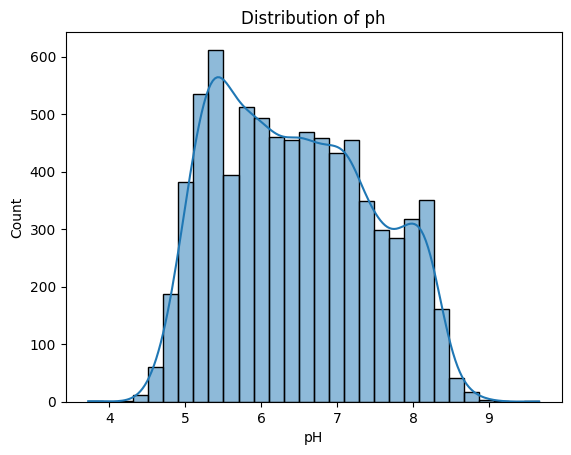

In [144]:
#visualize the ph 
sns.histplot(train_df['pH'] , bins=30,kde=True)
plt.title('Distribution of ph')
plt.show()


STEP 4 FEACTURE SELECTION AND PROCESSING

HANDLING MISSING VALUES

In [145]:
#FILLING MISSIG VALUES WITH COLUMN WITH MEAN
for column in train_df.columns:
    if train_df[column].isnull().any():
     train_df[column].fillna(train_df[column].mean(),inplace=True)

#fill missing values with columns mean
for column in test_df.columns:
     if test_df[column].isnull().any():
        test_df[column].fillna(test_df[column].mean(), inplace=True)


SOME COLUMNS ARE INDENTIFIERS OR NOT USEFUL FOR PREDICTION

In [146]:
#DROP NON NUMERIC OR IRRELEVANT COLUMNS 
columns_to_drop = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']
X = train_df.drop(columns=columns_to_drop)
y = train_df[columns_to_drop]

#feature selection
test_df=test_df.drop(columns=['PID','site'])
X_test = test_df

STEP 5 MODEL TRAING AND TESTING